# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [2]:
# Loading the data
data = pd.read_csv('MRT_DATASET_2011-2019_reshaped.csv')
data.dtypes
data.head()

,id,date,direction,station,count
0,1,4/1/2011 03:00:00,Entry,North Ave,0.0
1,2,4/1/2011 03:00:00,Exit,North Ave,0.0
2,3,4/1/2011 03:00:00,Entry,Quezon Ave,0.0
3,4,4/1/2011 03:00:00,Exit,Quezon Ave,0.0
4,5,4/1/2011 03:00:00,Entry,GMA Kamuning,0.0


In [3]:
# data wrangling
data['date']= pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek
data['hourofday'] = data['date'].dt.hour
data.head()

sep5 = data.query("year=='2019' & month=='9' & day=='5' & direction=='Entry'")
sep5 = sep5.groupby(['hourofday'], as_index=False).sum()

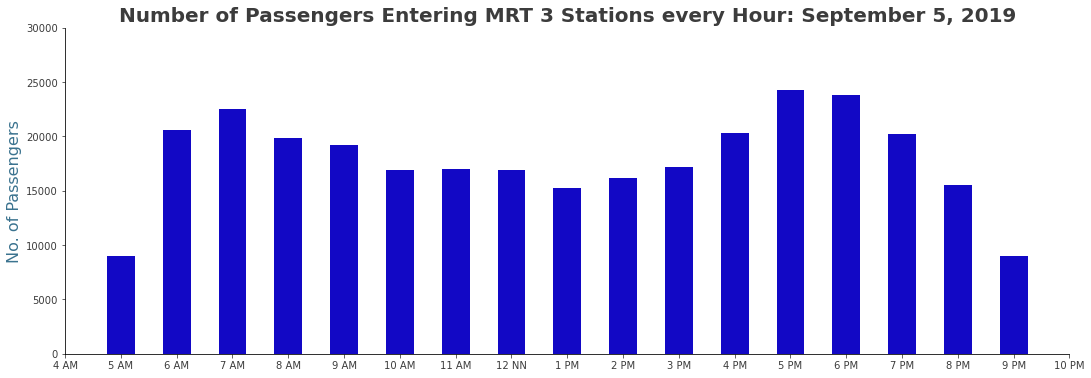

In [4]:
# visualizing the data
textColor = '#3c3c3c'
highlightColor = '#3b738f'
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.labelcolor'] = highlightColor
plt.rcParams['xtick.color'] = textColor
plt.rcParams['ytick.color'] = textColor

fig1 = sep5.plot('hourofday', 'count', kind='bar', figsize=(18,6), color='#1208C5')
fig1.set_title('Number of Passengers Entering MRT 3 Stations every Hour: September 5, 2019', fontsize =20, fontweight='bold')
fig1.set_xlabel('Hour of the day', fontsize=14).set_visible(False)
fig1.set_xlim([3,21])
fig1.set_xticklabels(['12 AM','1 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 NN', 
                      '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM',
                        '9 PM', '10 PM', '11 PM'], rotation=0)
fig1.set_ylim([0,30000])
fig1.set_ylabel('No. of Passengers', fontsize=16)
fig1.spines['right'].set_visible(False)
fig1.spines['top'].set_visible(False)
fig1.legend(fontsize=14).set_visible(False)

In [5]:
# Save your figure

Caption: This figure shows the aggregate count of passengers entering any station of Metro Manila's Metro Rail Transit (MRT) Line 3 at hourly intervals on September 5, 2019. This chart illustrates the 2 "peak" hours of the day -- first, between 7:00 am to 7:59 am, and second, between 5:00 pm to 6:00 pm. At any given hour, close to 10,000 passengers enter MRT 3 stations.  